In [1]:
import pandas as pd
from rdkit.Chem import PandasTools
from helper_functions import string_to_int_list, string_to_dict
from mol_drawing import draw_mol_with_highlight_varying_colour, show_png

In [2]:
#import val data and model explanations
df_val = PandasTools.LoadSDF('../data/val_set_Ames.sdf', idName='internalID', molColName='Molecule')
df_val.set_index('internalID', inplace=True)

df_explanations_iginput = pd.read_csv('../results/atom_attributions_val_iginput.csv', index_col=0)
df_explanations_ighidden = pd.read_csv('../results/atom_attributions_val_ighidden.csv', index_col=0)

In [3]:
#highest atom attributions in dataset to scale colour intensity
max_attr_ig_input = 0.612
max_attr_ig_hidden = 0.133

In [4]:
#function to draw attribution
def draw_attribution_mol(idx,df_mol,mol_col,df_attribution_atoms,attribution_info_col,abs_limit):
    """
    idx: idx of mol to draw
    df_mol: df containing mol
    mol_col: col with mol data
    df_attribution_atoms: df containing attribution data
    attribution_info_col: col with attribution data
    abs_limit: highest atom attribution in dataset to scale colour intensity
   
   returns None, draws mol
    """
    mol = df_mol.loc[str(idx),mol_col]
    attr_string = df_attribution_atoms.loc[idx,attribution_info_col]
    attr_dict = string_to_dict(attr_string,'|',int,float)
    png_data = draw_mol_with_highlight_varying_colour(mol,attr_dict,absolute_limit=abs_limit,label_values=True)
    img = show_png(png_data)
    display(img)
    
    return None

Mol5889


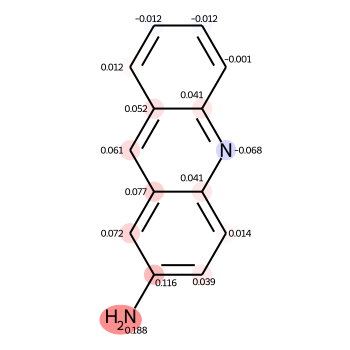

Mol5890


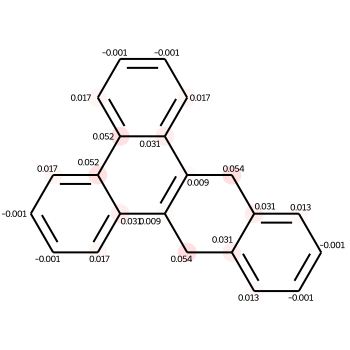

Mol5891


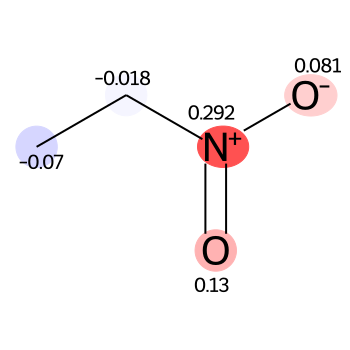

Mol5892


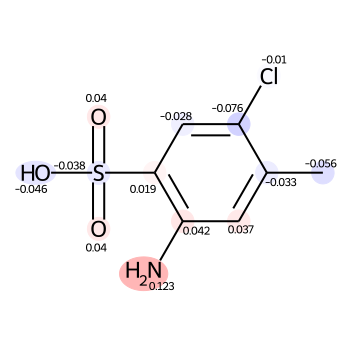

Mol5893


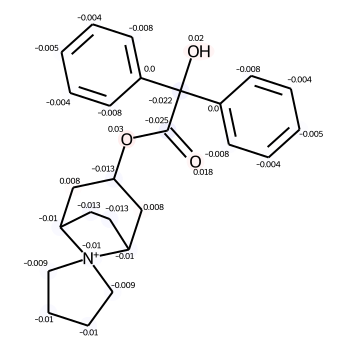

Mol5894


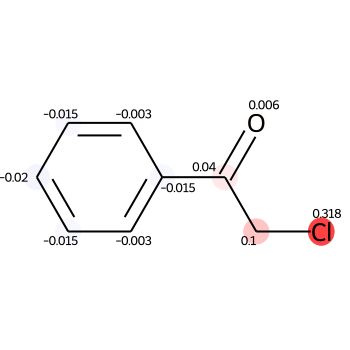

Mol5895


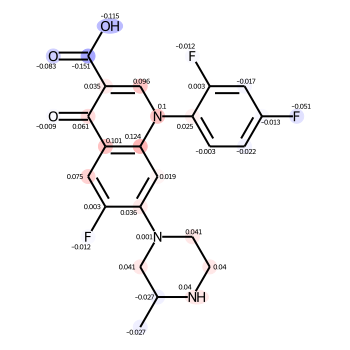

Mol5896


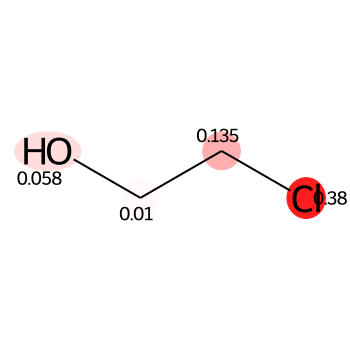

Mol5897


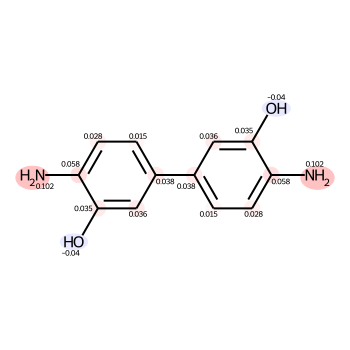

Mol5898


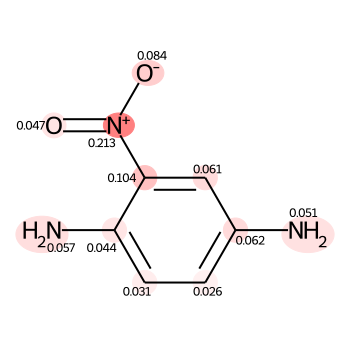

In [5]:
#visualise explanations by IG_input (first 10 examples)
for idx in df_val.index[:10]:
    print(idx)
    draw_attribution_mol(idx,df_val,'Molecule',df_explanations_iginput,'atom_attributions',max_attr_ig_input)

Mol5889


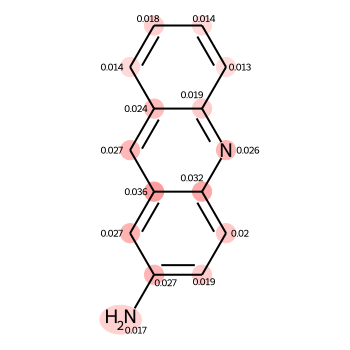

Mol5890


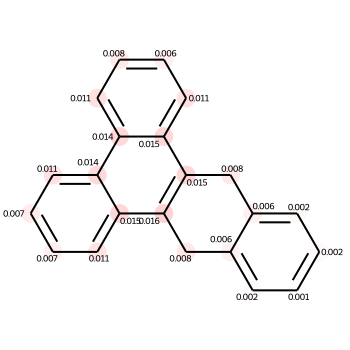

Mol5891


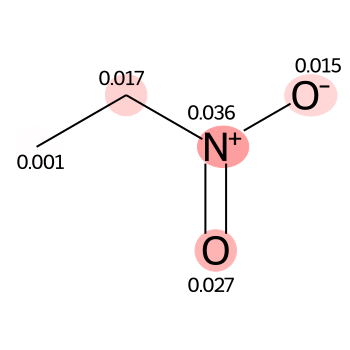

Mol5892


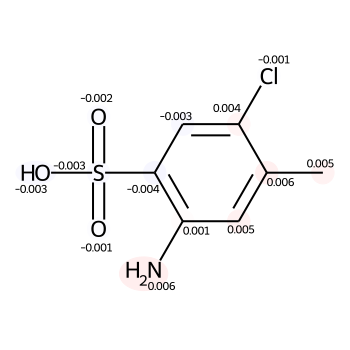

Mol5893


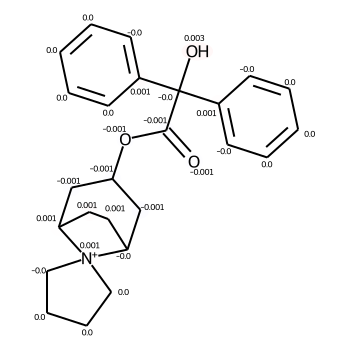

Mol5894


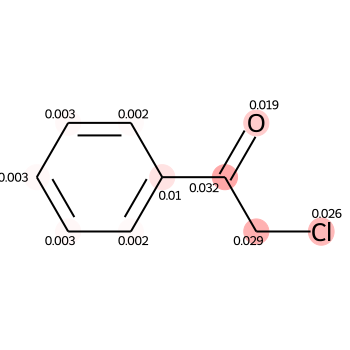

Mol5895


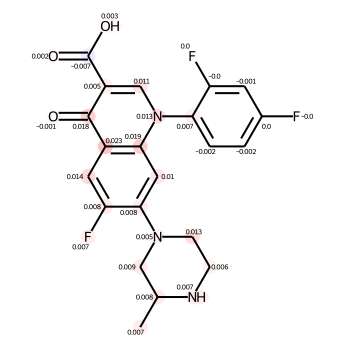

Mol5896


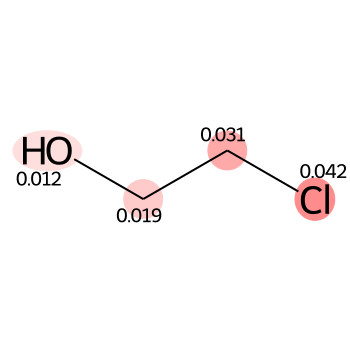

Mol5897


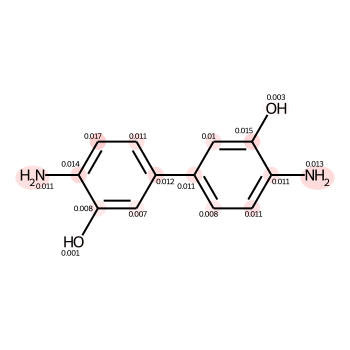

Mol5898


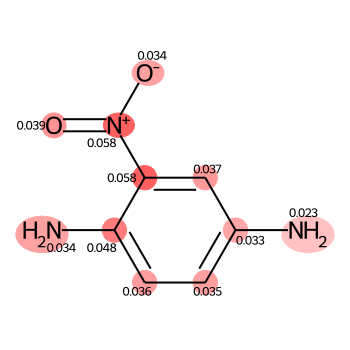

In [8]:
#visualise explanations by IG_hidden (first 10 examples)
for idx in df_val.index[:10]:
    print(idx)
    draw_attribution_mol(idx,df_val,'Molecule',df_explanations_ighidden,'atom_attributions',max_attr_ig_hidden)